В скважинах применяются геофизические методы, которые позволяют получать как элементный состав породы (XRF), так и минеральный (XRD).
Возникает задача - определить содержание конкретных элементов в конкретных минералах.

Для реализации данной задачи был исследован 141 образец. Для каждого из них имеются результаты как элементного, так и минерального состава.

Для начала загрузим данные.

In [685]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls
#считываем результаты XRD - компонентного состава
x_df = pd.read_csv(r'D:\1M\нов\\xrd_1.csv', sep = ';')
#считываем результаты XRF - минерального состава
y_df = pd.read_csv(r'D:\1M\нов\\xrf_1.csv', sep = ';')

In [687]:
x_df

,Illite,Chlorite,Kaolinite,Quartz,Feldspar,Plagioclase
0,0.080,0.010,0.040,0.540,0.120,0.210
1,0.084,0.011,0.074,0.621,0.053,0.158
2,0.082,0.020,0.082,0.592,0.082,0.143
3,0.060,0.010,0.030,0.620,0.060,0.220
4,0.030,0.030,0.030,0.630,0.100,0.180
...,...,...,...,...,...,...
136,0.076,0.054,0.043,0.641,0.011,0.174
137,0.035,0.058,0.116,0.500,0.012,0.279
138,0.063,0.078,0.094,0.531,0.047,0.188
139,0.060,0.010,0.100,0.460,0.070,0.300


Выше представлена таблица содержаний 6 минералов в каждом образце. Проанализируем ее.

In [690]:
x_df.describe()

,Illite,Chlorite,Kaolinite,Quartz,Feldspar,Plagioclase
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.080291,0.023901,0.063631,0.568787,0.062348,0.200965
std,0.077347,0.021948,0.054403,0.115953,0.039030,0.079988
min,0.000000,0.000000,0.000000,0.290000,0.000000,0.000000
25%,0.040000,0.010000,0.020000,0.480000,0.032000,0.150000
50%,0.056000,0.018000,0.050000,0.586000,0.053000,0.202000
75%,0.090000,0.031000,0.092000,0.641000,0.091000,0.253000
max,0.500000,0.111000,0.220000,1.000000,0.141000,0.436000


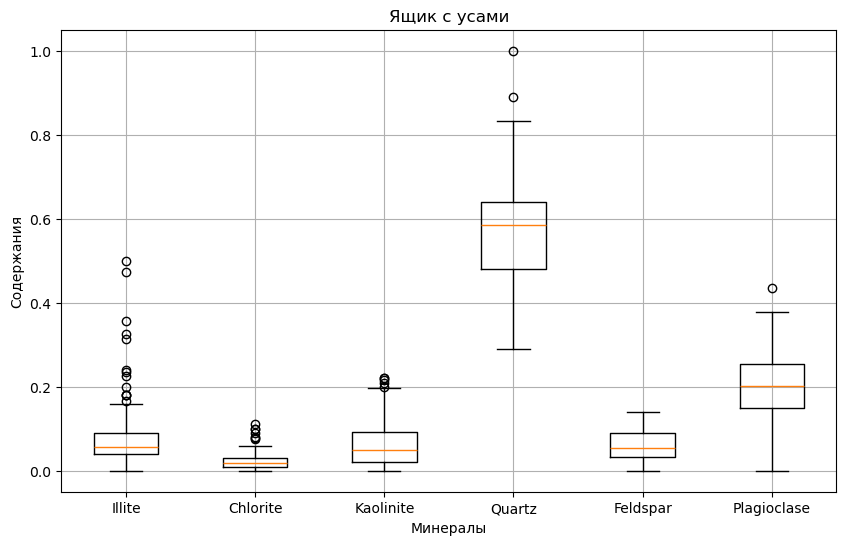

In [692]:
plt.figure(figsize=(10, 6))
plt.boxplot([x_df[col] for col in x_df.columns], labels=x_df.columns)
plt.title('Ящик с усами')
plt.xlabel('Минералы')
plt.ylabel('Содержания')
plt.grid(True)
plt.show()


In [694]:
y_df

,H,Na,Mg,Al,Si,K,Ca,Ti,Mn,Fe,O
0,0.006,0.014,0.010,0.077,0.302,0.028,0.004,0.005,0.000,0.044,0.510
1,0.008,0.013,0.011,0.081,0.288,0.024,0.003,0.006,0.000,0.047,0.519
2,0.008,0.013,0.012,0.083,0.293,0.026,0.003,0.005,0.000,0.042,0.516
3,0.006,0.021,0.007,0.073,0.316,0.026,0.006,0.004,0.000,0.030,0.511
4,0.006,0.018,0.008,0.066,0.318,0.026,0.006,0.003,0.000,0.036,0.513
...,...,...,...,...,...,...,...,...,...,...,...
136,0.009,0.010,0.019,0.078,0.265,0.013,0.010,0.007,0.001,0.083,0.505
137,0.010,0.017,0.016,0.070,0.278,0.011,0.050,0.005,0.002,0.030,0.511
138,0.014,0.014,0.015,0.062,0.246,0.011,0.086,0.004,0.002,0.030,0.516
139,0.006,0.022,0.034,0.070,0.280,0.011,0.006,0.008,0.000,0.066,0.496


Выше представлена таблица содержаний конкретных элементов в каждом образце. Проанализируем ее.

In [697]:
y_df.describe()

,H,Na,Mg,Al,Si,K,Ca,Ti,Mn,Fe,O
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.008660,0.017050,0.014092,0.065319,0.289333,0.019851,0.027298,0.004546,0.000794,0.041057,0.512007
std,0.005525,0.010962,0.007935,0.013908,0.049813,0.008118,0.053544,0.001838,0.001417,0.017882,0.008000
min,0.002000,0.001000,0.003000,0.003000,0.006000,0.000000,0.003000,0.000000,0.000000,0.002000,0.482000
25%,0.006000,0.013000,0.007000,0.058000,0.265000,0.012000,0.005000,0.003000,0.000000,0.030000,0.508000
50%,0.008000,0.017000,0.012000,0.068000,0.293000,0.022000,0.007000,0.004000,0.000000,0.037000,0.513000
75%,0.010000,0.019000,0.020000,0.073000,0.318000,0.027000,0.018000,0.006000,0.001000,0.050000,0.516000
max,0.049000,0.125000,0.034000,0.090000,0.384000,0.038000,0.384000,0.013000,0.008000,0.101000,0.552000


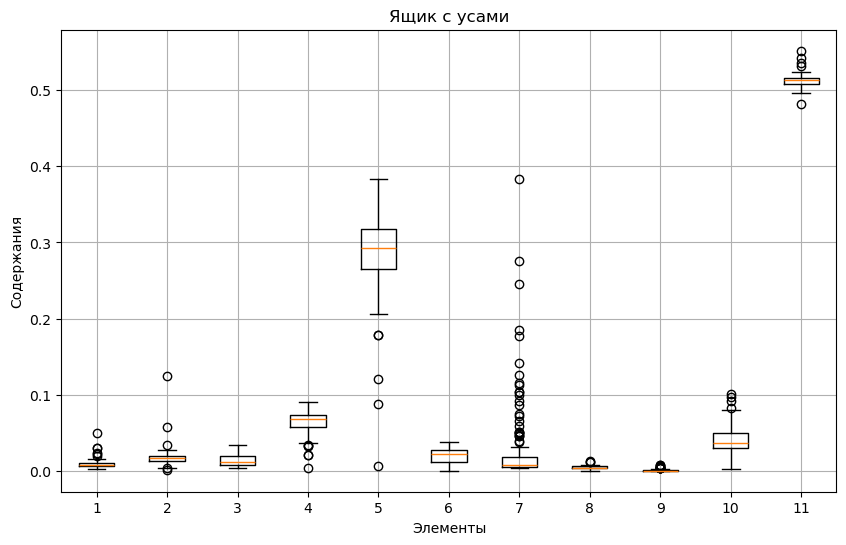

In [699]:
plt.figure(figsize=(10, 6))
plt.boxplot(y_df)
plt.title('Ящик с усами')
plt.xlabel('Элементы')
plt.ylabel('Содержания')
plt.grid(True)
plt.show()

Между содержаниями того или иного элемента и минерала существует <b>линейная зависимость y = xA</b>, где у - содержание конкретного элемента в образце, А - содержание элемента в конкретном минерале, х - доля этого минерала в породе. Эта линейная зависимость берется из данной системы уравнений:

$$
C_{Si} = K_{Q} * C_{Si}^{Q} + K_{Kfs} * C_{Si}^{Kfs}+ ...
$$

$$
C_{Mn} = K_{Q} * C_{Mn}^{Q} + K_{Kfs} * C_{Mn}^{Kfs}+ ...
$$

$$
C_{Na} = K_{Q} * C_{Na}^{Q} + K_{Kfs} * C_{Na}^{Kfs}+ ...
$$
$$
1 = K_{Q} + K_{Kfs} + ... + K_{Il}$$

где C<sub>Si</sub> - общее содержания элемента Si в породе, K<sub>Q</sub> - доля кварца Q в породе, С<sup>Q</sup><sub>Si</sub> - доля элемента Si в кварце Q и т.д.
Свободные члены C<sub>Si</sub>, C<sub>Mn</sub> и т.д. составят матрицу Y, С<sup>Q</sup><sub>Si</sub>, С<sup>Kfs</sup><sub>Si</sub> и т.д. - матрицу А, K<sub>Q</sub>, K<sub>Kfs</sub> - матрицу Х. В сумме концентрации всех минералов - Q, Kfs, Il, Chl, Kaol, Pl - должны составлять единицу.
<br><br><br>

$$
y = xA
$$
$$
X^T cdot Y = X^T cdot X cdot A
$$
$$
A = (X^T cdot X)^{-1} cdot X^T cd
$$
Стоит отметить, что матрица А индивидуальная для каждой задачи, что обусловлено различной геологией изучаемых территорий.


1) Найдем матрицу А с помощью МНК. Для этого сначала считаем значения из таблиц с данными.

$$
{Y}^{11 \times 141} = {A}^{11 \times 6} \times {X}^{6 \times 141}
$$

In [704]:
Y = y_df.values

In [706]:
Y

array([[0.006, 0.014, 0.01 , ..., 0.   , 0.044, 0.51 ],
       [0.008, 0.013, 0.011, ..., 0.   , 0.047, 0.519],
       [0.008, 0.013, 0.012, ..., 0.   , 0.042, 0.516],
       ...,
       [0.014, 0.014, 0.015, ..., 0.002, 0.03 , 0.516],
       [0.006, 0.022, 0.034, ..., 0.   , 0.066, 0.496],
       [0.011, 0.015, 0.03 , ..., 0.001, 0.063, 0.514]])

In [708]:
X = x_df.values

In [710]:
X

array([[0.08 , 0.01 , 0.04 , 0.54 , 0.12 , 0.21 ],
       [0.084, 0.011, 0.074, 0.621, 0.053, 0.158],
       [0.082, 0.02 , 0.082, 0.592, 0.082, 0.143],
       [0.06 , 0.01 , 0.03 , 0.62 , 0.06 , 0.22 ],
       [0.03 , 0.03 , 0.03 , 0.63 , 0.1  , 0.18 ],
       [0.051, 0.01 , 0.031, 0.592, 0.031, 0.286],
       [0.04 , 0.01 , 0.03 , 0.545, 0.121, 0.253],
       [0.02 , 0.01 , 0.02 , 0.657, 0.101, 0.192],
       [0.04 , 0.   , 0.03 , 0.6  , 0.08 , 0.25 ],
       [0.152, 0.01 , 0.   , 0.535, 0.03 , 0.273],
       [0.04 , 0.01 , 0.03 , 0.596, 0.091, 0.232],
       [0.03 , 0.01 , 0.02 , 0.586, 0.121, 0.232],
       [0.16 , 0.03 , 0.2  , 0.44 , 0.05 , 0.12 ],
       [0.04 , 0.01 , 0.04 , 0.626, 0.051, 0.232],
       [0.03 , 0.01 , 0.051, 0.586, 0.121, 0.202],
       [0.04 , 0.02 , 0.081, 0.616, 0.101, 0.141],
       [0.101, 0.03 , 0.03 , 0.667, 0.04 , 0.131],
       [0.04 , 0.01 , 0.01 , 0.626, 0.121, 0.192],
       [0.041, 0.   , 0.031, 0.714, 0.071, 0.143],
       [0.101, 0.01 , 0.131, 0.

Вычисляем матрицу А:

In [713]:
A = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))

In [715]:
A_rounded = np.round(A, 3)

In [717]:
A_rounded

array([[ 0.006,  0.007,  0.04 ,  0.085,  0.266,  0.011, -0.075,  0.011,
         0.   ,  0.147,  0.501],
       [ 0.068, -0.047,  0.01 , -0.085, -0.228, -0.092,  0.836, -0.002,
         0.027, -0.021,  0.528],
       [ 0.014,  0.018,  0.057,  0.173,  0.136,  0.027, -0.078,  0.015,
         0.001,  0.146,  0.495],
       [ 0.013,  0.006,  0.003,  0.04 ,  0.3  ,  0.02 ,  0.068,  0.002,
         0.   ,  0.019,  0.53 ],
       [-0.039,  0.071, -0.04 ,  0.132,  0.67 ,  0.126, -0.375,  0.001,
        -0.006,  0.004,  0.456],
       [ 0.004,  0.042,  0.04 ,  0.092,  0.26 ,  0.002,  0.015,  0.009,
         0.002,  0.048,  0.487]])

In [719]:
A_rounded.shape

(6, 11)

Осуществим обратный переход из матрицы А и матрицы Y в матрицу X и сравним полученные значения с искомыми значениями X из таблицы x_df, построив графики.

In [724]:
A_2 = A_rounded.T
#Добавляем столбец, состоящий из 1 для выполнения условия, что сумма концентраций минералов в образце должна равняться 1 (см. систему уравнений выше).
y_df['one'] = 1
b_1 = y_df.values  
new_row = np.ones((1, A_2.shape[1]))
A = np.vstack((A_2, new_row))
# Получаем X_generated_1 - новую матрицу содержаний минералов в породе
X_generated_1 = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(b_1.T))

In [726]:
X_generated_1

array([[ 5.18491199e-02, -2.66199312e-02, -6.86425643e-02,
        -4.29336186e-02,  6.67697112e-02,  5.16881471e-02,
        -1.12207281e-01,  3.90522621e-02, -2.63944361e-02,
         7.32678436e-03,  3.02781515e-02,  1.63059706e-02,
         8.84166973e-02, -6.72640464e-02,  2.13150226e-02,
        -9.81664065e-03,  1.93618731e-01,  1.27188962e-01,
         2.05887044e-01, -1.03116685e-01, -1.98907589e-02,
         6.64453591e-02,  2.84912727e-01, -2.23520135e-01,
        -2.46354415e-02, -8.76385415e-02,  3.19260773e-02,
         7.23002341e-02,  1.32386873e-01, -5.39661210e-02,
        -2.85015707e-02,  3.93509883e-02, -7.60161351e-02,
         3.33000437e-01, -3.63933318e-02, -2.92705687e-02,
         5.54079667e-02, -4.46898939e-02, -1.28402767e-01,
        -2.77137964e-02,  6.07660469e-02,  3.09905135e-02,
         2.01650107e-02,  1.33951330e-01,  1.07452465e-01,
         4.82554720e-01, -7.39864314e-02, -1.13600570e-02,
         5.43112544e-02, -1.36635883e-02,  1.81152092e-0

In [728]:
X_generated_1.shape

(6, 141)

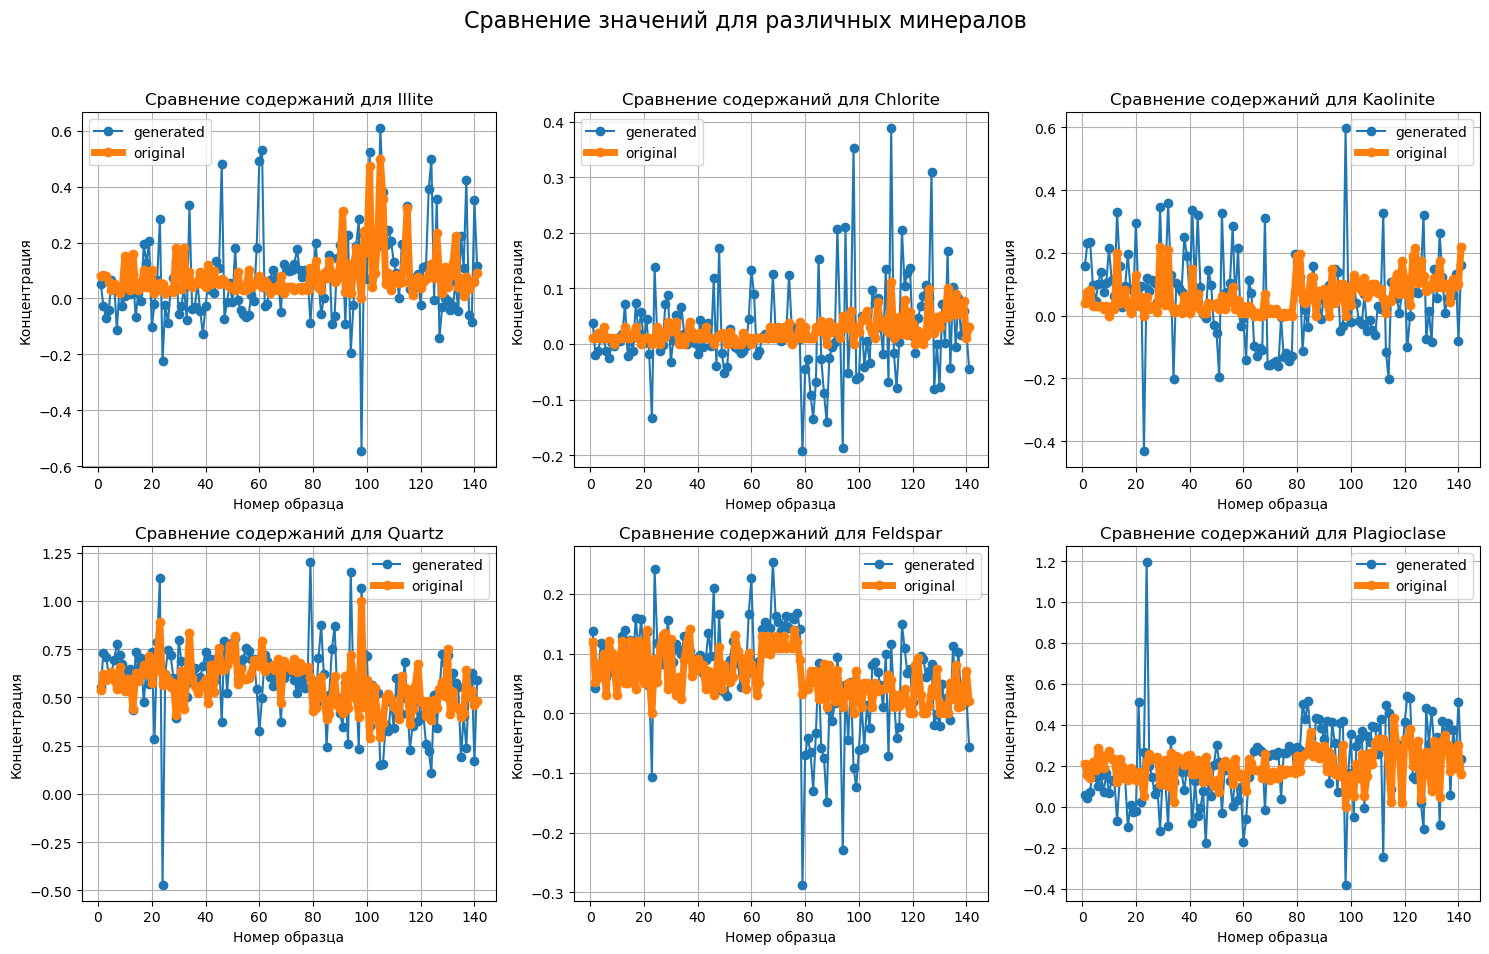

In [734]:
numbers = [0, 1, 2, 3, 4, 5] #номера столбцов с минералами 
labels = ['Illite',	'Chlorite',	'Kaolinite', 'Quartz', 'Feldspar', 'Plagioclase']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 строки и 3 столбца
axs = axs.flatten()  

for num in numbers:
    y_values_A = X_generated_1[num]  # Берем значения из X_generated_1
    x_values_A = np.arange(1, len(y_values_A) + 1)  

    y_values_id = X.T[num]  # Берем значения из оригинальной таблицы 
    x_values_id = np.arange(1, len(y_values_id) + 1)  

    # Строим график на соответствующей оси
    axs[num].plot(x_values_A, y_values_A, marker='o', linestyle='-', label='generated')
    axs[num].plot(x_values_id, y_values_id, linewidth=5, marker='o', linestyle='-', label='original')
  
    # Настраиваем график
    axs[num].set_title(f'Сравнение содержаний для {labels[num]}')  # Заголовок для каждого графика
    axs[num].set_xlabel('Номер образца')
    axs[num].set_ylabel('Концентрация')
    axs[num].legend()
    axs[num].grid()

# Настраиваем общий заголовок для всей фигуры
plt.suptitle('Сравнение значений для различных минералов', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Настраиваем отступы
plt.show()


Как мы можем наблюдать, какие-то значения в матрице А<0, что является неверным для решения искомой задачи, поскольку содержания элементов не могут задаваться отрицательным числом. В этом и заключается минус МНК: регрессия по данному методу часто может стать неустойчивой, то есть сильно зависящей от обучающих данных, что обычно является проявлением тенденции к переобучению.
Попробуем использовать наборы методов линейных моделей, чтоб добиться более точных значений.

2) Обратимся к поиску матрицы А с использованием регуляризации Тихонова.
В основе данного кода лежит сглаживающая регуляризация Тихонова–Филлипса:
$$(A ∗Ax + αΩ)x = A ∗ b
$$

[В.С. Антюфеев. Регуляризация решения системы линейных алгебраических уравнений методом максимального правдоподобия. Сибирский журнал вычислительной математики. 2013. Т. 16, № 3] 


In [756]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold  
from sklearn.metrics import mean_squared_error
Считываем матрицы X и Y из файлов CSV
x_df = pd.read_csv(r'D:\1M\нов\\xrd_new.csv', sep=';')
y_df = pd.read_csv(r'D:\1M\нов\\xrf_new_2.csv', sep=';')
X_1 = x_df.iloc[:, 1:].values
Y = y_df.iloc[:, 1:].values  
X = X_1.T
def compute_A(X, Y, lambda_reg):
    n_features = X.shape[1]
    I = np.eye(n_features) #создаем единичную матрицу размером n_features x n_features.
    A = np.linalg.inv(X.T @ X + lambda_reg * I) @ (X.T @ Y)
    return A
def find_optimal_lambda(X, Y, lambdas, n_splits=5):
    kf = KFold(n_splits=n_splits) #кросс-валидация с n_splits (по умолчанию 5) используется для оценки производительности модели.
    best_lambda = None
    best_mse = float('inf')
    
    for lambda_reg in lambdas:
        mse_list = []
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]
            
            A = compute_A(X_train, Y_train, lambda_reg)
            Y_pred = X_test @ A
            
            mse = mean_squared_error(Y_test, Y_pred)
            mse_list.append(mse)
        
        mean_mse = np.mean(mse_list)
        #print(f'Lambda: {lambda_reg}, Mean MSE: {mean_mse}')
        
        if mean_mse < best_mse:
            best_mse = mean_mse
            best_lambda = lambda_reg
            
    return best_lambda

# Определение диапазона значений для lambda
lambdas = np.logspace(-5, 2, 100) 

# Поиск оптимального lambda
optimal_lambda = find_optimal_lambda(X, Y, lambdas)
print(f'Оптимальное значение lambda: {optimal_lambda}')

# Вычисление матрицы A с оптимальным lambda
optimal_A = compute_A(X, Y, optimal_lambda)
print("Матрица A с оптимальным lambda:", optimal_A)

Оптимальное значение lambda: 0.01291549665014884
Матрица A с оптимальным lambda: [[ 6.55318986e-03  6.12479498e-03  3.96863035e-02  8.45692942e-02
   2.61702809e-01  1.07146137e-02 -6.85043733e-02  1.16318832e-02
   6.67660636e-04  1.46290181e-01  5.01438635e-01]
 [ 5.71869158e-02 -3.72000137e-02  1.07598281e-02 -6.32133147e-02
  -1.81774403e-01 -7.40072916e-02  6.79973571e-01 -5.42987933e-04
   2.09154273e-02 -1.06281114e-02  4.48111834e-01]
 [ 1.53447329e-02  1.62337295e-02  5.49231440e-02  1.63021107e-01
   1.20399769e-01  2.09082907e-02 -4.74171149e-02  1.44042185e-02
   9.58971541e-04  1.41189864e-01  4.92628630e-01]
 [ 1.29163989e-02  6.75253322e-03  2.40781394e-03  4.11823288e-02
   3.04457894e-01  2.03315282e-02  6.65851728e-02  1.74178429e-03
   3.06699819e-04  1.88190927e-02  5.34388613e-01]
 [-3.63087139e-02  6.67302161e-02 -3.80311728e-02  1.24265928e-01
   6.29160622e-01  1.17261267e-01 -3.54622977e-01  9.05317126e-04
  -5.26333698e-03  2.20126240e-03  4.21860487e-01]
 [ 3

In [655]:
optimal_A.shape

(6, 11)

Осуществим обратный переход из матрицы А и матрицы Y в матрицу X и сравним полученные значения с искомыми значениями X из таблицы x_df, построив графики.

In [658]:
A_3 = optimal_A.T 
new_row_1 = np.ones((1, A_3.shape[1]))
A_4 = np.vstack((A_3, new_row_1))
X_generated_2 = np.linalg.inv(A_4.T.dot(A_4)).dot(A_4.T.dot(b_1.T))

In [660]:
X_generated_2

array([[ 3.50200001e-02, -1.98250431e-02, -6.46796236e-02,
        -4.74863783e-02,  6.56648436e-02,  5.79467269e-02,
        -1.00464953e-01,  4.44305971e-02, -2.33350553e-02,
         1.66357402e-03,  2.94957313e-02,  1.17609205e-02,
         5.31885782e-02, -5.68929230e-02,  2.26089829e-02,
        -1.25194739e-03,  1.64250350e-01,  1.22882114e-01,
         1.88993669e-01, -1.05060953e-01, -4.04492910e-02,
         8.18815092e-02,  3.73190611e-01, -3.02078253e-01,
        -2.83561800e-02, -8.10145524e-02,  3.69689868e-02,
         5.34235010e-02,  8.91927965e-02, -3.59728771e-02,
        -2.82556051e-02,  1.33033971e-02, -8.45015613e-02,
         3.29201889e-01, -4.45838561e-02, -2.77770616e-02,
         5.11045055e-02, -5.48543094e-02, -1.29941496e-01,
        -1.60414077e-02,  3.99299682e-02,  3.82247324e-02,
         4.66934169e-03,  1.21574583e-01,  1.15977601e-01,
         4.43725499e-01, -5.33485819e-02, -6.67740691e-02,
         6.90906713e-02,  1.62696201e-02,  2.15357265e-0

In [662]:
X_generated_2.shape

(6, 141)

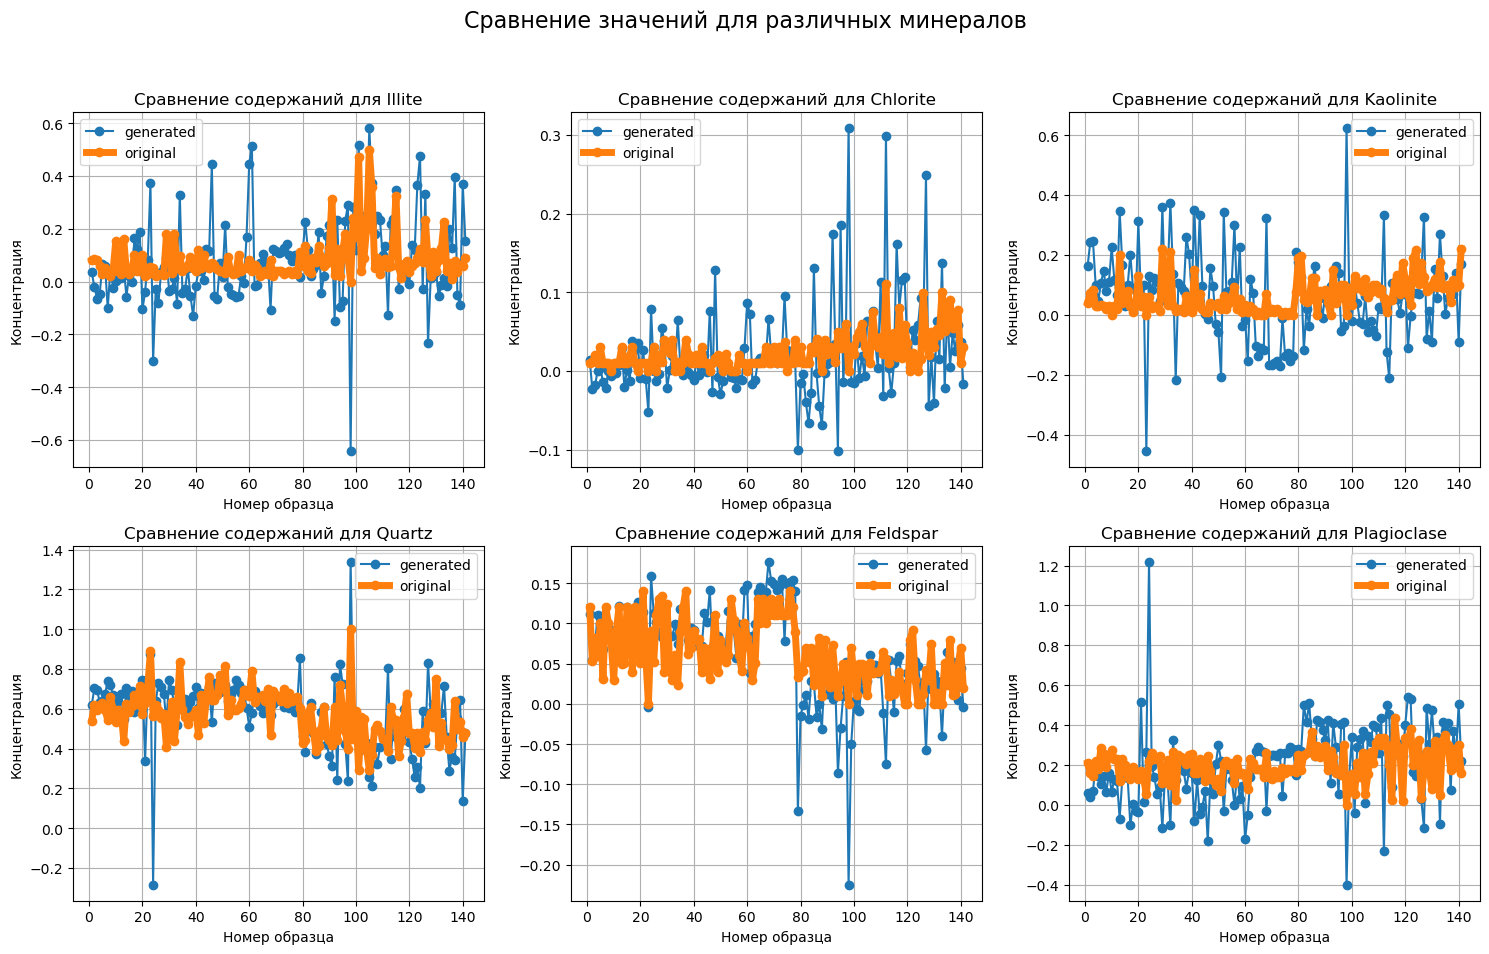

In [736]:

numbers = [0, 1, 2, 3, 4, 5]
labels = ['Illite',	'Chlorite',	'Kaolinite', 'Quartz', 'Feldspar', 'Plagioclase']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 строки и 3 столбца
axs = axs.flatten()  # Упрощаем доступ к осям

for num in numbers:
    y_values_A = X_generated_2[num]  # Берем значения из Y_generated
    x_values_A = np.arange(1, len(y_values_A) + 1)  

    y_values_id = X.T[num]  # Берем значения из id
    x_values_id = np.arange(1, len(y_values_id) + 1)  

    # Строим график на соответствующей оси
    axs[num].plot(x_values_A, y_values_A, marker='o', linestyle='-', label='generated')
    axs[num].plot(x_values_id, y_values_id, linewidth=5, marker='o', linestyle='-', label='original')
  
    # Настраиваем график
    axs[num].set_title(f'Сравнение содержаний для {labels[num]}')  # Заголовок для каждого графика
    axs[num].set_xlabel('Номер образца')
    axs[num].set_ylabel('Концентрация')
    axs[num].legend()
    axs[num].grid()

# Настраиваем общий заголовок для всей фигуры
plt.suptitle('Сравнение значений для различных минералов', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Настраиваем отступы
plt.show()


Попробуем найти матрицу А методом NNLS, который исключит возможность получения отрицательных значений.

In [741]:
def compute_A_nnls(X, Y):
    n_samples, n_features = X.shape
    A = np.zeros((n_features, Y.shape[1]))  # Инициализация матрицы A
    
    for i in range(Y.shape[1]):  # Для каждого столбца Y
        # Решение задачи NNLS
        A[:, i], _ = nnls(X, Y[:, i])  # Параметры: X и соответствующий столбец Y
    
    return A

# Нахождение матрицы A
A_nnls = compute_A_nnls(X, Y)
print("Матрица A, найденная методом NNLS:")
print(A_nnls)
print(A_nnls.shape)

Матрица A, найденная методом NNLS:
[[6.23722459e-03 5.02820281e-03 3.87184714e-02 8.17130458e-02
  2.57758481e-01 7.76026913e-03 0.00000000e+00 1.13046926e-02
  1.05411736e-04 1.46103597e-01 5.01242037e-01]
 [7.23336003e-02 0.00000000e+00 1.40416041e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.39288191e-01 0.00000000e+00
  2.69425379e-02 0.00000000e+00 5.27799623e-01]
 [2.07278298e-02 1.11721319e-02 6.44646674e-02 1.59843139e-01
  1.01948819e-01 1.18603500e-02 0.00000000e+00 1.44723045e-02
  1.92600024e-03 1.42838173e-01 4.94684117e-01]
 [9.08632599e-03 5.77952600e-03 0.00000000e+00 3.94514823e-02
  2.98344128e-01 1.84781540e-02 1.93744944e-02 1.58088927e-03
  0.00000000e+00 1.84605227e-02 5.29748242e-01]
 [0.00000000e+00 7.28979619e-02 0.00000000e+00 1.35724083e-01
  6.78766949e-01 1.28533499e-01 0.00000000e+00 7.06776644e-04
  0.00000000e+00 4.87187624e-03 4.56043741e-01]
 [0.00000000e+00 4.04187462e-02 3.33339255e-02 8.81745620e-02
  2.49922314e-01 0.00000000e+00 0.00000000e

In [743]:
A_5 = A_nnls.T 
new_row_1 = np.ones((1, A_5.shape[1]))
A_6 = np.vstack((A_5, new_row_1))
X_generated_3 = np.linalg.inv(A_6.T.dot(A_6)).dot(A_6.T.dot(b_1.T))

In [745]:
X_generated_3

array([[ 1.37196811e-02, -2.19679731e-02, -7.24697287e-02,
        -5.43414337e-02,  5.33741128e-02,  5.52989972e-02,
        -1.02109880e-01,  2.99664302e-02, -2.86234118e-02,
        -1.05056828e-02,  2.07958711e-02, -5.18973673e-03,
         2.41070092e-02, -5.64290211e-02,  6.45775821e-03,
        -1.19036373e-02,  1.21186983e-01,  9.88469713e-02,
         1.50621636e-01, -1.24371691e-01, -3.97263812e-02,
         6.91952718e-02,  3.93998148e-01, -2.72459541e-01,
        -3.71795213e-02, -8.67933489e-02,  2.24757716e-02,
         5.92519583e-02,  5.39983813e-02, -3.66467619e-02,
        -3.14204939e-02, -1.48662023e-02, -8.41374165e-02,
         3.24987713e-01, -5.58130524e-02, -3.34141164e-02,
         3.93104474e-02, -6.13638126e-02, -1.30895840e-01,
        -2.08261720e-02,  1.48220679e-02,  3.50753739e-02,
        -1.41898633e-02,  9.30735211e-02,  9.52673091e-02,
         3.76044395e-01, -5.81832345e-02, -2.90908998e-02,
         6.78773375e-02,  2.52561878e-02,  2.16965786e-0

In [747]:
X_generated_3.shape

(6, 141)

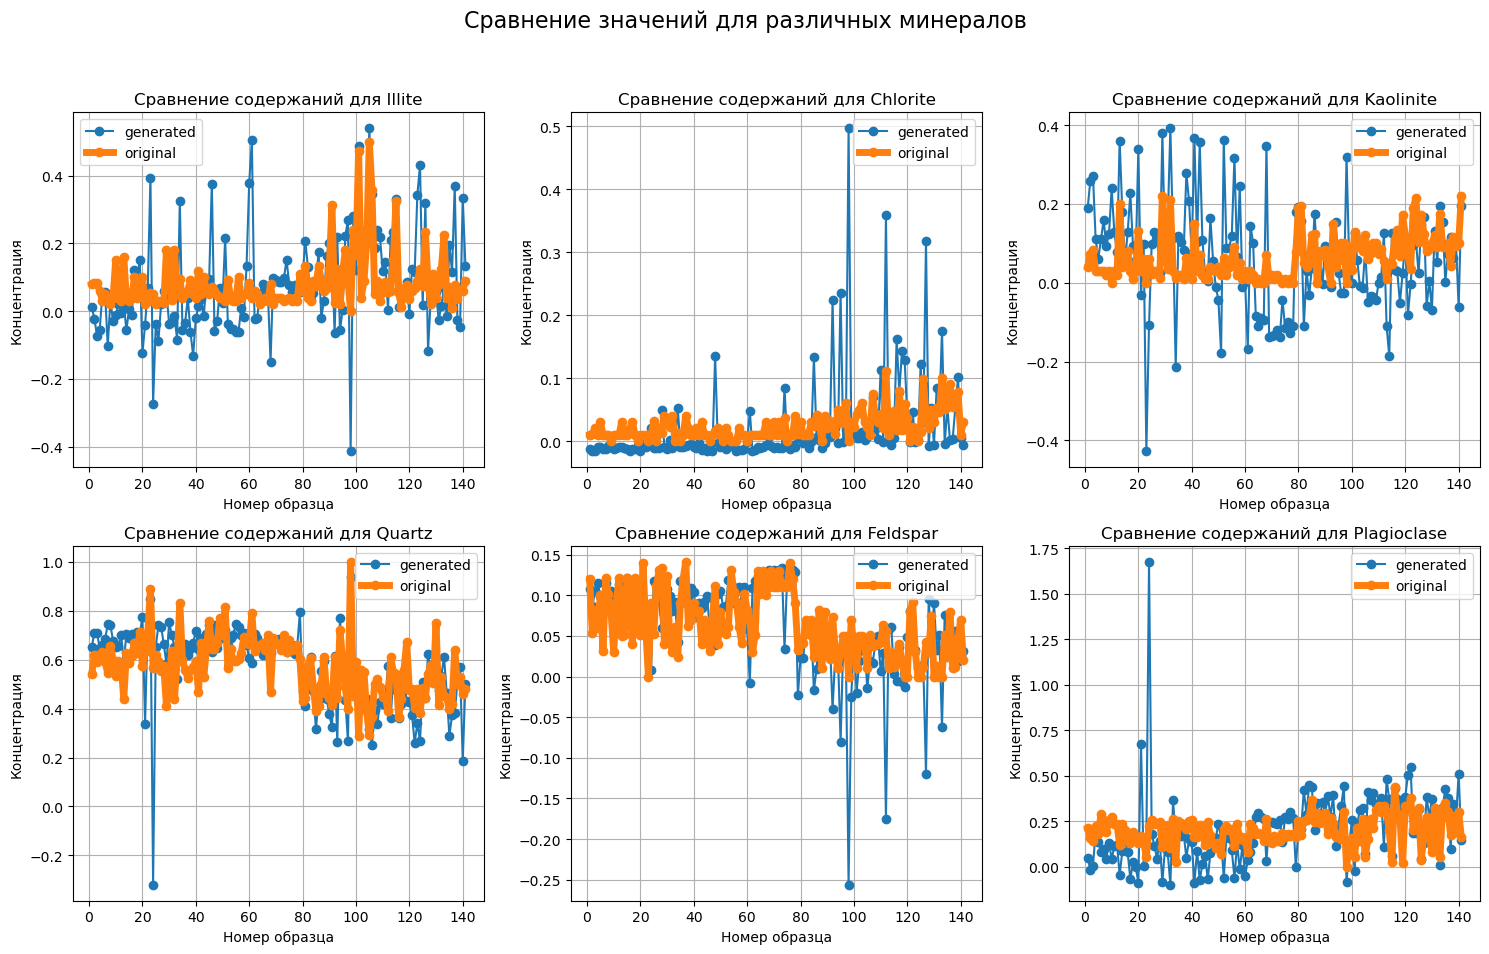

In [749]:
numbers = [0, 1, 2, 3, 4, 5]
labels = ['Illite',	'Chlorite',	'Kaolinite', 'Quartz', 'Feldspar', 'Plagioclase']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 строки и 3 столбца
axs = axs.flatten()  # Упрощаем доступ к осям

for num in numbers:
    y_values_A = X_generated_3[num]  # Берем значения из Y_generated
    x_values_A = np.arange(1, len(y_values_A) + 1)  

    y_values_id = X.T[num]  # Берем значения из id
    x_values_id = np.arange(1, len(y_values_id) + 1)  

    # Строим график на соответствующей оси
    axs[num].plot(x_values_A, y_values_A, marker='o', linestyle='-', label='generated')
    axs[num].plot(x_values_id, y_values_id, linewidth=5, marker='o', linestyle='-', label='original')
  
    # Настраиваем график
    axs[num].set_title(f'Сравнение содержаний для {labels[num]}')  # Заголовок для каждого графика
    axs[num].set_xlabel('Номер образца')
    axs[num].set_ylabel('Концентрация')
    axs[num].legend()
    axs[num].grid()

# Настраиваем общий заголовок для всей фигуры
plt.suptitle('Сравнение значений для различных минералов', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Настраиваем отступы
plt.show()

Вывод: таким образом, с помощью систем линейных уравнений можно найти приблизительное значение содержаний конкретных элементов в минералах, однако для получения более точных значений необходимо развивать новые методы исследований.